In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

sns.set_style('whitegrid')

original = pd.read_csv('house.csv')

original.head() #pierwsze kilka rzędów tabeli

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
original.info() # Zbiór nie ma żadnych NULL wartości

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
price_bin        21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(16), object(1)
mem

## Zacznijmy od predikcji ceny ciągłej

In [59]:
good_features = original.drop('price_bin', axis = 1)
# price_bin wyrzucamy ze zbioru danych na czas predykcji ceny

Powstaje również pytanie czy wyrzycać takie kolumny jak "id", które teorytycznie (oraz partząc na scatterplot id vs cena) nie mają nic wspólnego z ceną nieruchomości. Ponieważ zatrzymałem się na wykorzystaniu metod wykorzystujących drzewa dycyzyjne, zdecydowałem nie wyrzucać te kolumny, ponieważ jeżeli nie będą przydatne w predykcji ceny, po prostu nie będą nigdy wybrane podczas rozgałęzień. 

In [60]:
# Przekształćmy kolumnę date na liczbę dni pomiędzy dniem oraz dniem najwcześniejszego wpisu. W taki sposób algorytmy
# będą miały możliwość korzystać z tej zmiennej

dates = (original['date'].apply(lambda x: datetime(year=int(x.split('T')[0][0:4]), month=int(x.split('T')[0][4:6]),day=int(x.split('T')[0][6:8]))))
mindate = min(dates)
dates = dates.apply(lambda x:(x - mindate).days)
good_features['date'] = dates

In [61]:
good_features.head() # tak teraz wygląda początek DataFrame

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,164,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,221,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,299,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,221,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,292,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [62]:
from sklearn.model_selection import train_test_split

In [112]:
X = good_features.drop('price', axis = 1)
y = good_features['price']

In [113]:
#Podzielenie danych na zbiór ćwiczeniowy oraz testowy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Wstępnie porównując różne regressory na zbiorze danych doszedłem do wniosku że najlepiej sprawdzają się metody tree based methods, dlatego zacząłem od Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rfr = RandomForestRegressor(n_estimators = 200)

In [127]:
rfr.fit(X = X_train, y = y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [128]:
from sklearn import metrics

In [129]:
predictions = rfr.predict(X_test)

In [130]:
print ('RMSE ', np.sqrt(metrics.mean_squared_error(predictions, y_test)))
print ('Explained variance', metrics.explained_variance_score(predictions, y_test))

RMSE  127361.0732214068
Explained variance 0.8518816741337613


Jak widać model Random Forest daje całkiem dobre wyniki bez żadnej modyfikacji

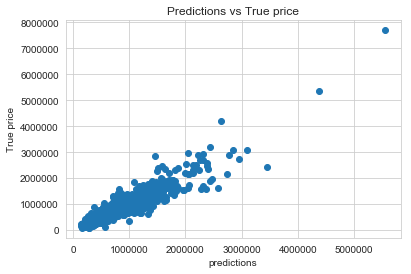

In [71]:
plt.title('Predictions vs True price')
plt.xlabel('predictions')
plt.ylabel('True price')
plt.scatter(x = predictions,y = y_test)

Wynik 0.85 będzie wynikiem odniesienia, więc warto sprobować dostać lepszy wynik

Probując polepszyć wynik modelu Random Forest zdecydowałem się wykorzystać bibliotekę, która implementuje state of the art metodę nazywaną **Extreme Gradient Boosting**

In [105]:
import xgboost as xgb

In [123]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.2,
                max_depth = 5, n_estimators = 100)

In [124]:
xg_reg.fit(X_train,y_train)

preds_xgb = xg_reg.predict(X_test)

In [125]:
print ('RMSE ', np.sqrt(metrics.mean_squared_error(preds_xgb, y_test)))
print ('Explained variance', metrics.explained_variance_score(preds_xgb, y_test))

RMSE  122145.35406981994
Explained variance 0.8702389346782631


Jak widać model odrazu daje lepsze wyniki, dlatego skupię się na tym modelu oraz znalezieniu najlepszych hyperparametrów

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [195]:
# Różne hyperparametry dla XGBoost, podebrane z doświadczenia

params = {
        'learning_rate': [0.05, 0.1, 0.2, 0.6],
        'gamma': [0.01, 0.1, 0.05, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'max_depth': [4, 5, 6, 8]
        }

In [196]:
xgb_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100)

folds = 5

In [197]:
# Znalezienie hyperparametrów tylko wykorzystując część X_train, oraz y_train za pomocą poszukiwania wyczerpującego
# wśród parametrów params

grid = GridSearchCV(estimator=xgb_reg2, param_grid=params, scoring='explained_variance', n_jobs=-1, cv=folds, verbose=1)

In [198]:
grid.fit(X_train, y_train) 

print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ )
print('\n Best parameters:')
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 21.6min finished



 Best estimator:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.01,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

 Best score:
0.8983879933791739

 Best parameters:
{'colsample_bytree': 1.0, 'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.8}


In [199]:
xgb_reg2 = xgb.XGBRegressor(objective ='reg:squarederror',colsample_bytree = grid.best_params_['colsample_bytree'],
                            gamma=grid.best_params_['gamma'], learning_rate = grid.best_params_['learning_rate'],
                            max_depth = grid.best_params_['max_depth'],subsample = grid.best_params_['subsample'], 
                            n_estimators = 200)

Trenowanie modelu z najlepszymi hyper parametrami, na większej liczbie estymatorów

In [200]:
xgb_reg2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.01,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

In [201]:
predictions_refit = xgb_reg2.predict(X_test)
preds_best = grid.best_estimator_.predict(X_test)

In [203]:
print ('RMSE ', np.sqrt(metrics.mean_squared_error(predictions_refit, y_test)))
print ('Refited Explained variance', metrics.explained_variance_score(predictions_refit, y_test))

RMSE  121230.03896751818
Refited Explained variance 0.8725317099073082


Jak widać znalezienie najlepszych hyperparametrów polepszyło wyniki

# Klasyfikacja price_bin

In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
import warnings
warnings.filterwarnings('ignore')

Ponieważ algorytm XGBoost działał najlepiej dla regresji, wykorzystamy go również dla klasyfikacji

In [87]:
# hyper parametry XGBoost
params = {
        'min_child_weight': [1, 4, 10],
        'gamma': [0.2, 0.5, 1],
        'subsample': [0.6,1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

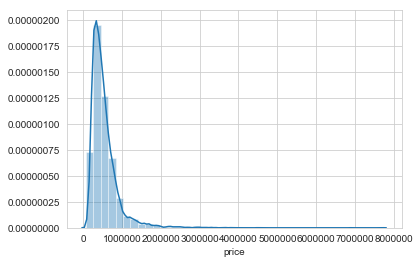

In [88]:
sns.distplot(a = (good_features['price']), bins = 40) # rozpodział cen

In [89]:
X = good_features.drop(['price'],axis = 1) # Wyrzucenie kolumny price
y = original['price_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [91]:
xgb = XGBClassifier(objective='binary:logistic', nthread=-1, n_estimators=40)

folds = 5

# Ponieważ rozpodział cen nie jest normalnym, StratifiedKFold jest wykorzystany dla podzielenia danych
# w celu cross validation
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='f1', cv=skf.split(X_train,y_train), verbose=1 )

In [92]:
grid.fit(X_train, y_train)

print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  6.0min finished



 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

 Best score:
0.7964833077716023


In [93]:
class_preds = grid.best_estimator_.predict(X_test)

In [94]:
print ('confusion matrix: \n', confusion_matrix(y_test, class_preds))

confusion matrix: 
 [[2976   26]
 [  89  151]]


In [95]:
print ('confusion matrix: \n', classification_report(y_test, class_preds))

confusion matrix: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3002
           1       0.85      0.63      0.72       240

    accuracy                           0.96      3242
   macro avg       0.91      0.81      0.85      3242
weighted avg       0.96      0.96      0.96      3242



Większość wpisów przynależy klasie 'price_bin' 0, dlatego algorytm klasyfikacji będzie (procentowo) klasyfikować nieprawidłowo całkiem dużą liczbę wpisów jako 0. To znaczy ,że recall dla "1" jest niski.

Aby zmienić ten efekt, można zastosować kilka różnych metod

Jedna z nich nazywa się **Undersampling**, polegająca na zmniejszeniu liczby wpisów w klasie 0, w zbiórze ćwiczeniowym.

In [96]:
from imblearn.under_sampling import ClusterCentroids

In [97]:
cc = ClusterCentroids(random_state=42)
X_under, y_under = cc.fit_resample(X_train, y_train)

In [98]:
print ('licaba wbisów z "0"', len(y_under)-sum(y_under))
print ('liczba wpisów z "1"', sum(y_under))

licaba wbisów z "0" 1225
liczba wpisów z "1" 1225


Po zastosowaniu tej metody, liczba wpisów "1" oraz "0" w y_under jest tak sama

In [99]:
grid3 = GridSearchCV(estimator=xgb, param_grid=params, scoring='f1', cv=skf.split(X_under,y_under), verbose=1 )

In [100]:
grid3.fit(X_under, y_under)

print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

 Best score:
0.7964833077716023


[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  1.2min finished


In [101]:
class_preds3 = grid3.best_estimator_.predict(X_test)

In [102]:
print ('confusion matrix: \n', confusion_matrix(y_test, class_preds3))

confusion matrix: 
 [[2214  788]
 [   3  237]]


In [103]:
print ('confusion matrix: \n', classification_report(y_test, class_preds3))

confusion matrix: 
               precision    recall  f1-score   support

           0       1.00      0.74      0.85      3002
           1       0.23      0.99      0.37       240

    accuracy                           0.76      3242
   macro avg       0.61      0.86      0.61      3242
weighted avg       0.94      0.76      0.81      3242



W danym przypadku widać, że chociaż recall dla "1" został lepszy jednak precision zmniejszył się do 0.23. W zależności od celu klasfikacji, możemy wybrać jedną lub drugą strategię, bądź szukać inny kompromis.

### Wnioski

W tej pracy przeanalizowałem zbiór danych dotyczących ceny nieruchomości. Najlepszy wynik regresji mierzony za pomocą metryki explained variance to około **0.87** który został osiągnięty za pomocą metody XGBoost. Aby otrzymać lepsze wyniki pierwsza rzecz która może być zrobiona to feature engineering. Jednem przykładem możliwej nowej cechy może być stworzenie klastrów geograficznych na podstawie kolumn "lat" i "long" aby odzwierciedlić różne miejscowości. Oprócz tego warto również sprobować stosowanć inne metody regresji. 

Podczas predykcji zmiennej "price_bin" również została wykorzyatana metoda XGBoost. Najlepszy wynik mierzony za pomocą weighted f1-score to **0.96**. W zależności od tego jaki stawimy sobie cel podczas klasyfikacji możemy na przyklad  zrobić nacisk na prawidłową klasyfikacje mniejszego klasu, za pomocą metod takich jak undersampling lub oversampling. Aby osiągnąć lepszy wynik klasyfikacji, mamy dostępną dużą liczbę innych metod klasyfikacji, które mogą pokazać dobre wyniki.